***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [67]:
import pandas
import numpy
import seaborn
import scipy

# verificando as versões

print('Versão do pandas -> %s' % pandas.__version__)
print('Versão do numpy -> %s' % numpy.__version__)
print('Versão do seaborn -> %s' % seaborn.__version__)
print('Versão do scipy -> %s' % scipy.__version__)

Versão do pandas -> 2.2.2
Versão do numpy -> 1.26.4
Versão do seaborn -> 0.13.2
Versão do scipy -> 1.13.1


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [117]:
import pandas as pd

dados=pd.read_csv('dados.csv')


### Visualize o conteúdo do DataFrame

In [63]:
dados=pd.read_csv('dados.csv')
type(dados)
dados.head(15) # mostrar as 15 primeiras linhas do meu dataframe


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [157]:
classes=[0, 1576, 3940, 11820, 19700, 200000]



### 2º Definir os labels das classes

In [158]:
labels =['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [159]:
frequencia_renda_exe= pd.value_counts(
    pd.cut(x=dados.Renda,
            bins=classes,
            labels=labels,
            include_lowest=True,)

                                     )

frequencia_renda_exe

<ipython-input-159-daa83720c990>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia_renda_exe= pd.value_counts(


,count
Renda,
E,49755
D,18602
C,7241
B,822
A,420


### 4º Construir a coluna de percentuais

In [160]:
percentagem_renda_exe= pd.value_counts(
    pd.cut(x=dados.Renda,
            bins=classes,
            labels=labels,
            include_lowest=True,),
            normalize=True
                )*100

percentagem_renda_exe

<ipython-input-160-f76a3c1b7309>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentagem_renda_exe= pd.value_counts(


,proportion
Renda,
E,64.751432
D,24.208745
C,9.423477
B,1.069755
A,0.546590


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [161]:
dist_freq_quantitativas_rendas_classes_exe = pd.DataFrame({'Classes Escolhidas': frequencia_renda_exe, 'Porcentagem_distribuição  (%)': percentagem_renda_exe})
dist_freq_quantitativas_rendas_classes_exe.sort_index(ascending=False) # ordenando as linhas de acordo com os labels das classes

,Classes Escolhidas,Porcentagem_distribuição (%)
Renda,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


In [162]:
dist_freq_quantitativas_rendas_classes_exe = pd.DataFrame({'Classes Escolhidas': frequencia_renda_exe, 'Porcentagem_distribuição  (%)': percentagem_renda_exe})
dist_freq_quantitativas_rendas_classes_exe.columns



Index(['Classes Escolhidas', 'Porcentagem_distribuição  (%)'], dtype='object')

### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

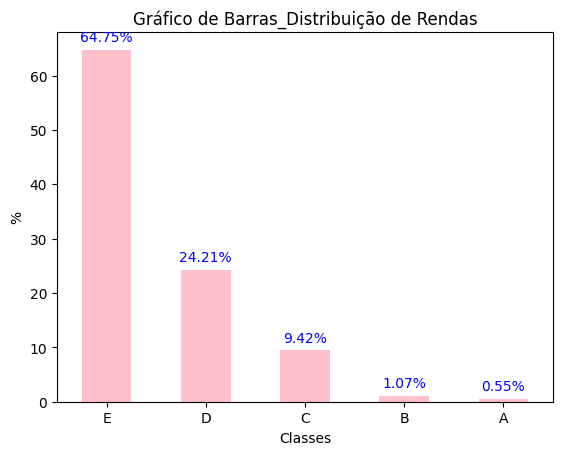

In [163]:
import matplotlib.pyplot as plt  # importanto a bilbioteca matplot lib


# Plotar o gráfico de barras
dist_freq_quantitativas_rendas_classes_exe['Porcentagem_distribuição  (%)'].plot(kind='bar', legend=False, color='Pink')

# Adicionar rótulos de dados sobre as barras
for i, valor in enumerate(dist_freq_quantitativas_rendas_classes_exe['Porcentagem_distribuição  (%)']):
    plt.text(i, valor + 1, f'{valor:.2f}%', ha='center', va='bottom', fontsize=10, color='blue')

plt.title('Gráfico de Barras_Distribuição de Rendas')
plt.xlabel('Classes')
plt.ylabel('%')
plt.xticks(rotation=0)  # Rotacionar os rótulos do eixo x
plt.show()


> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [164]:
# verificar nosso data frame novamente
dados.head(4)



,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158


In [ ]:
# idade, anos de estudo, renda e altura são variáveis quantitativas

<Axes: xlabel='Idade', ylabel='Count'>

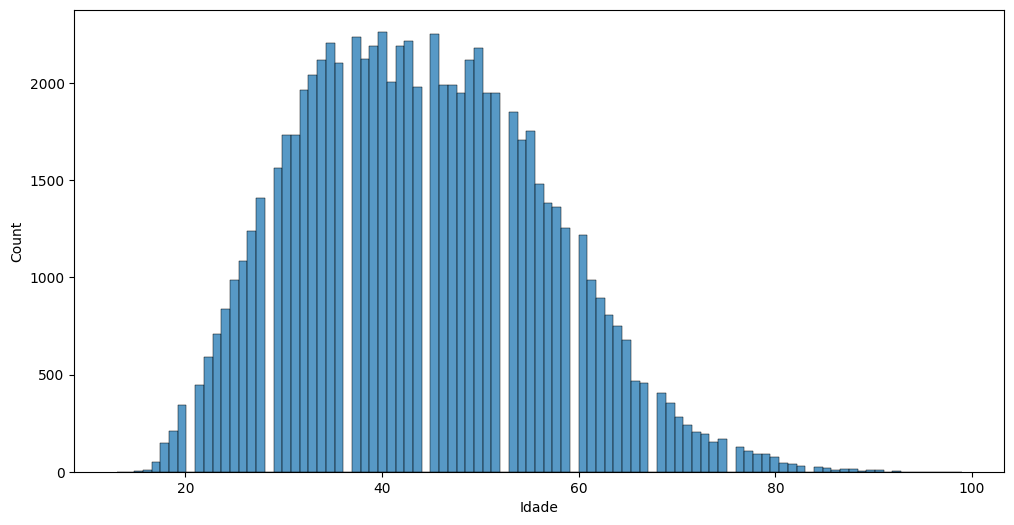

In [78]:
import seaborn as sns
ax_idade = sns.histplot(dados.Idade)
ax_idade.figure.set_size_inches(12,6)
ax_idade

<Axes: xlabel='Altura', ylabel='Count'>

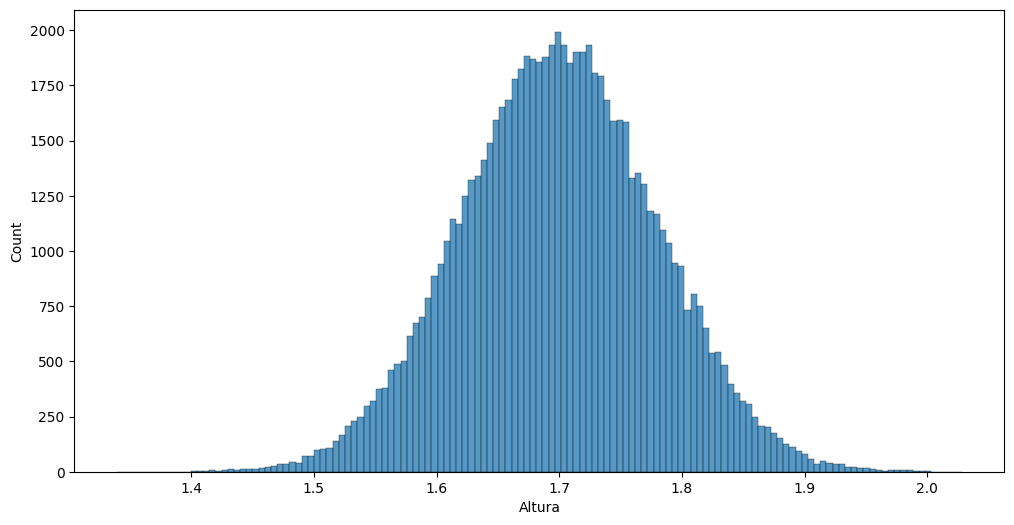

In [79]:
ax_altura = sns.histplot(dados.Altura)
ax_altura.figure.set_size_inches(12,6)
ax_altura

<Axes: xlabel='Anos de Estudo', ylabel='Count'>

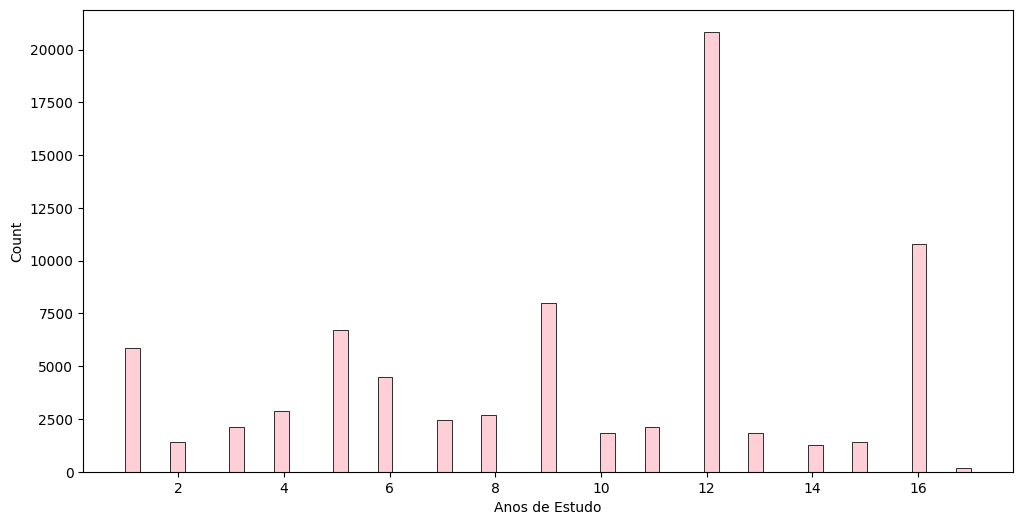

In [81]:
ax_anos = sns.histplot(dados['Anos de Estudo'], color = 'pink')
ax_anos.figure.set_size_inches(12,6)
ax_anos

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Axes: title={'center': 'Distribuição de Renda até R$20.000 de salário'}, xlabel='Salários em R$', ylabel='Frequência'>

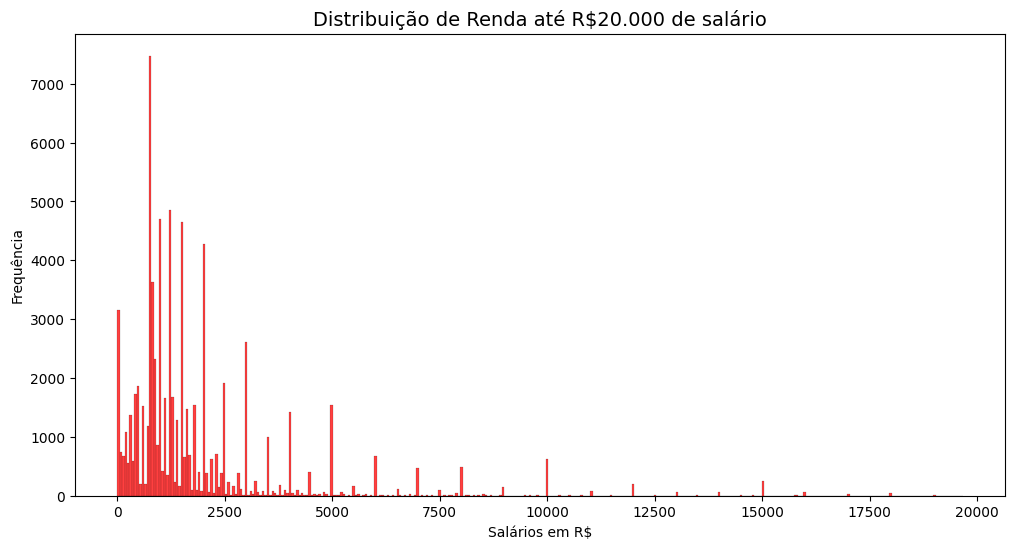

In [85]:
ax_renda = sns.histplot(dados.query('Renda < 20000').Renda, color='red' )
ax_renda.figure.set_size_inches(12,6)
ax_renda.set_title('Distribuição de Renda até R$20.000 de salário', fontsize=14)
ax_renda.set_xlabel('Salários em R$', fontsize=10)
ax_renda.set_ylabel('Frequência', fontsize=10)
ax_renda

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [86]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [93]:
frequencia_sexo_cor = pd.crosstab(dados.Sexo,dados.Cor)
frequencia_sexo_cor.rename(index = sexo, inplace = True)
frequencia_sexo_cor.rename(columns = cor, inplace = True)
print('Valores absolutos')
print(frequencia_sexo_cor) # valores absolutos.

percentual_sexo_cor = round(pd.crosstab(dados.Sexo,dados.Cor, normalize = True)*100,2)
percentual_sexo_cor.rename(index = sexo, inplace = True)
percentual_sexo_cor.rename(columns = cor, inplace = True)
percentual_sexo_cor
print('<><><><><><><><><><><><><><>')
print('Valores Percentuais')
print(percentual_sexo_cor) # valores absolutos.

Valores absolutos
Cor        Indígena  Branca  Preta  Amarela  Parda
Sexo                                              
Masculino       256   22194   5502      235  25063
Feminino        101    9621   2889      117  10862
<><><><><><><><><><><><><><>
Valores Percentuais
Cor        Indígena  Branca  Preta  Amarela  Parda
Sexo                                              
Masculino      0.33   28.88   7.16     0.31  32.62
Feminino       0.13   12.52   3.76     0.15  14.14


> ### Conclusões

A popoulação parda é superior em quantidade para ambos os sexos. Além do mais a popuplação Branca Masculina mais que o dobro da população femina de mesma cor.


A distribuição de renda é bem desigual no País, o que não é novidade.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [165]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [166]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [96]:
dados.Renda.mode()

,Renda
0,788


### Obtenha o desvio médio absoluto

In [99]:
desvio_medio_absoluto = (dados['Renda'] - dados['Renda'] .mean()).abs().mean()
desvio_medio_absoluto

1526.4951371638058

### Obtenha a variância

In [101]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [102]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [167]:
Renda_SEXO = dados.groupby('Sexo')['Renda'].agg(['mean', 'median', 'max'])
Renda_SEXO.rename(index = sexo, inplace = True)
print('Valores absolutos da renda Por sexo')
print(Renda_SEXO) # valores absolutos.

Valores absolutos da renda Por sexo
                  mean  median     max
Sexo                                  
Masculino  2192.441596  1350.0  200000
Feminino   1566.847393   900.0  120000


In [108]:
Renda_cor = round(dados.groupby('Cor')['Renda'].agg(['mean', 'median', 'max']),2)
Renda_cor.rename(index = cor, inplace = True)
print('Valores absolutos da renda Por coloração de peloe')
print(Renda_cor) # valores absolutos.

Valores absolutos da renda Por coloração de peloe
             mean  median     max
Cor                              
Indígena  1472.89   788.0  120000
Branca    2679.02  1500.0  200000
Preta     1442.29  1000.0   50000
Amarela   4182.92  2450.0   50000
Parda     1513.60  1000.0  100000


In [169]:
Renda_SEXO_e_Cor = pd.crosstab( dados.Cor,
                                dados.Sexo,
                                values = dados.Renda,
                                aggfunc = {'mean','median','max'})
Renda_SEXO_e_Cor.rename(index = cor, inplace = True)
Renda_SEXO_e_Cor.rename(columns = sexo, inplace = True)
Renda_SEXO_e_Cor

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

A população de pele amarela possui as maiores rendas. A média salário masculina é maior que a Feminina.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [109]:
Renda_SEXO_disp = dados.groupby('Sexo')['Renda'].agg(['var', 'std'])
Renda_SEXO_disp.rename(index = sexo, inplace = True)
print('Valores absolutos da renda Por sexo')
print(Renda_SEXO_disp) # valores absolutos.

Valores absolutos da renda Por sexo
                    var          std
Sexo                                
Masculino  1.289035e+07  3590.312915
Feminino   6.608310e+06  2570.663414


In [110]:
Renda_cor_disp = round(dados.groupby('Cor')['Renda'].agg(['var', 'std']),2)
Renda_cor_disp.rename(index = cor, inplace = True)
print('Valores absolutos da renda Por coloração de peloe')
print(Renda_cor_disp) # valores absolutos.

Valores absolutos da renda Por coloração de peloe
                  var      std
Cor                           
Indígena  41590867.82  6449.10
Branca    19080868.14  4368.17
Preta      3135140.91  1770.63
Amarela   27239003.05  5219.10
Parda      4548909.14  2132.82


In [171]:
Renda_SEXO_e_Cor = pd.crosstab( dados.Cor,
                                dados.Sexo,
                                values = dados.Renda,
                                aggfunc = {'var','std'})
Renda_SEXO_e_Cor.rename(index = cor, inplace = True)
Renda_SEXO_e_Cor.rename(columns = sexo, inplace = True)
Renda_SEXO_e_Cor

std                         var              
Sexo        Masculino      Feminino     Masculino      Feminino
Cor                                                            
Indígena  1204.093490  11957.498292  1.449841e+06  1.429818e+08
Branca    4750.791872   3251.013154  2.257002e+07  1.056909e+07
Preta     1936.309271   1349.799809  3.749294e+06  1.821960e+06
Amarela   5740.824820   3731.173660  3.295707e+07  1.392166e+07
Parda     2312.087184   1596.233048  5.345747e+06  2.547960e+06

> ### Conclusões

O desvio padrão da renda entre pessoas do sexo masculino é maior do que para o feminio. Além do mais, o desvio padrão é maior nas pessoas de pele amarela e para os indígenas.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

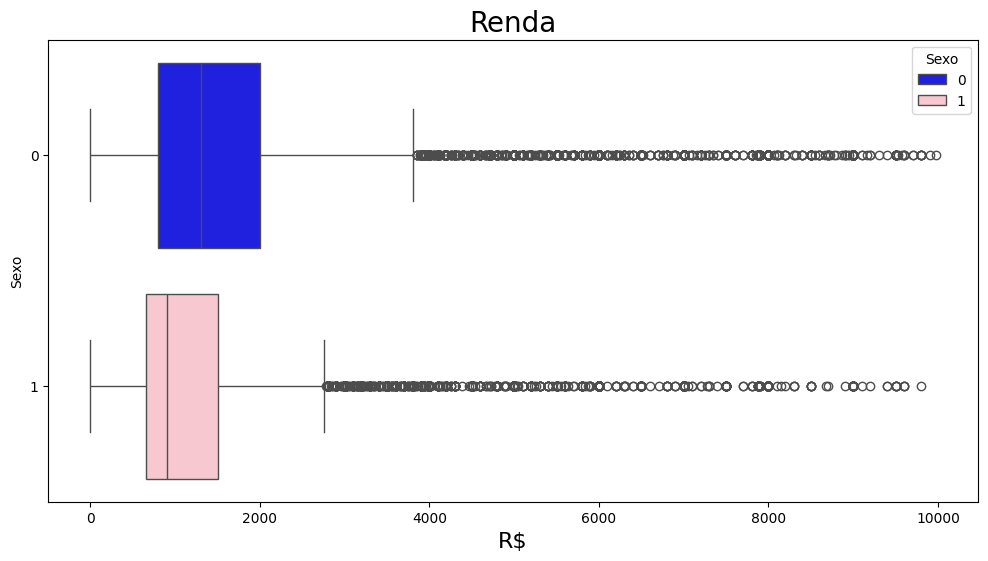

In [112]:
ax_renda_sexo=sns.boxplot(x= 'Renda',y = 'Sexo',data = dados.query('Renda<10000'), orient = 'h', palette={'blue', 'pink'}, hue='Sexo' )
ax_renda_sexo.figure.set_size_inches(12,6)
ax_renda_sexo.set_title('Renda', fontsize=20)
ax_renda_sexo.set_xlabel('R$', fontsize=16)
ax_renda_sexo

<ipython-input-172-f3f74a8f234d>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_renda_sexo.set_yticklabels(novo)


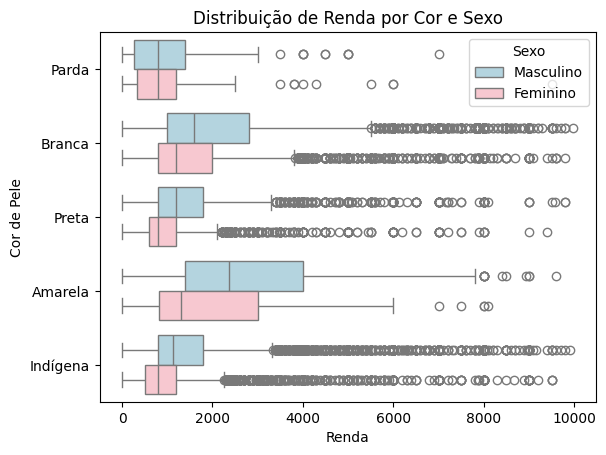

In [172]:
# Criar o boxplot da renda por sexo
ax_renda_sexo= sns.boxplot(x='Renda', y='Cor', hue='Sexo', orient = 'h', data=dados.query('Renda<10000'), palette={0:'lightblue', 1:'pink'})

# Ajustar título e rótulos
plt.title('Distribuição de Renda por Cor e Sexo')
plt.xlabel('Renda')
plt.ylabel('Cor de Pele')

# Alterar os rótulos do eixo y usando o dicionário de cor
novo = [cor[label] for label in dados['Cor'].unique()]
ax_renda_sexo.set_yticklabels(novo)

# Personalizar a legenda
handles, labels = ax_renda_sexo.get_legend_handles_labels()  # Pega a legenda original
ax_renda_sexo.legend(handles, ['Masculino', 'Feminino'], title='Sexo', loc='upper right')  # Altera a legenda

# Exibir o gráfico
plt.show()


> ### Conclusões

A renda da população Amarela é maior que o restante da população e, para qualque cor, com exceção da cor parda, a renda média para os homens é maior.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [175]:
import numpy as np
from scipy import stats

stats.percentileofscore(dados.Renda, 788, kind='weak') # tipo de corte  é fraco ou seja, deve incluir o valor


28.867777199375325

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [130]:
dados.Renda.quantile(0.99)

15000.0

99% das pessoas ganham até 15000 de salário.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [134]:
Renda_Anos = round(dados.groupby(['Anos de Estudo', 'Sexo'])['Renda'].agg(['mean', 'var','max']),2)
print('Valores absolutos da renda por Anos de Estudo')
print(Renda_Anos) # valores absolutos.

Valores absolutos da renda por Anos de Estudo
                        mean          var     max
Anos de Estudo Sexo                              
1              0      799.49   1048381.21   30000
               1      516.20    408719.24   10000
2              0      895.63   1774092.27   30000
               1      492.77    180873.15    2000
3              0      931.18   2059723.91   40000
               1      529.91    248237.29    4000
4              0     1109.20   4595879.01   80000
               1      546.85    179881.55    3500
5              0     1302.33   2015893.91   50000
               1      704.28    396337.48   10000
6              0     1338.65   2204187.37   35000
               1      781.39    404219.57    8000
7              0     1448.88   2180432.03   25000
               1      833.73    330104.29    6000
8              0     1465.50   2015572.72   40000
               1      830.75    362449.79    9000
9              0     1639.40   2296994.00   30000
    

In [177]:
# pode ser assim também

Renda_SEXO_e_Anos = pd.crosstab( dados['Anos de Estudo'],
                                 dados.Sexo,
                                 values = dados.Renda,
                                 aggfunc = {'mean', 'median', 'max', 'std'})
Renda_SEXO_e_Anos.rename(index = anos_de_estudo, inplace = True)
Renda_SEXO_e_Anos.rename(columns = sexo, inplace = True)
Renda_SEXO_e_Anos

max                  mean               \
Sexo                           Masculino Feminino    Masculino     Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano     30000    10000   799.494638   516.201748   
1 ano                              30000     2000   895.629047   492.771987   
2 anos                             40000     4000   931.178986   529.911638   
3 anos                             80000     3500  1109.203862   546.853916   
4 anos                             50000    10000  1302.329283   704.279111   
5 anos                             35000     8000  1338.653218   781.389776   
6 anos                             25000     6000  1448.875419   833.732824   
7 anos                             40000     9000  1465.497940   830.751004   
8 anos                             30000    18000  1639.396667   933.615351   
9 anos                             60000    20000  1508.038850   868.021700   
10 anos                            45000     6000  1731.270847   925.919225   
11 anos                           200000   100000  2117.060504  1286.790889   
12 anos                            30000   120000  2470.330776  1682.313725   
13 anos                            25000    20000  3195.099154  1911.730047   
14 anos                            50000    20000  3706.620269  2226.460457   
15 anos ou mais                   200000   100000  6134.279790  3899.513231   
Não determinados                    7000     3000  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<ipython-input-153-722163970406>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_renda_sexo.set_yticklabels(novo)


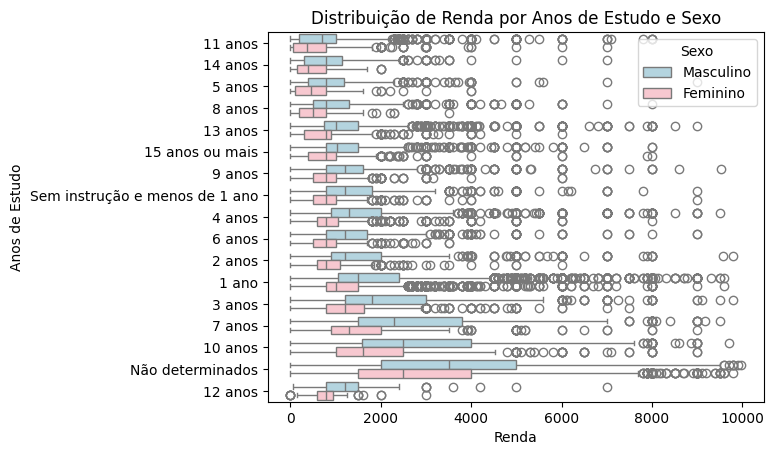

In [153]:
# Criar o boxplot da renda por anos de estudo e Sexo
ax_renda_sexo= sns.boxplot(x='Renda', y='Anos de Estudo', hue='Sexo', orient = 'h', data=dados.query('Renda<10000'), palette={0:'lightblue', 1:'pink'})

# Ajustar título e rótulos
plt.title('Distribuição de Renda por Anos de Estudo e Sexo')
plt.xlabel('Renda')
plt.ylabel('Anos de Estudo')

# Alterar os rótulos do eixo y usando o dicionário de Anos de Estudo
novo = [anos_de_estudo[label] for label in dados['Anos de Estudo'].unique()]
ax_renda_sexo.set_yticklabels(novo)

# Personalizar a legenda
handles, labels = ax_renda_sexo.get_legend_handles_labels()  # Pega a legenda original
ax_renda_sexo.legend(handles, ['Masculino', 'Feminino'], title='Sexo', loc='upper right')  # Altera a legenda

# Exibir o gráfico
plt.show()

> ### Conclusões

Aparentemente, tempos de estudo maiores não garatem rendas maiores.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [178]:
Renda_UF = round(dados.groupby('UF')['Renda'].agg(['mean', 'median','max','std']),2)
Renda_UF.rename(index = uf, inplace = True)
print('Valores absolutos da renda por Estado da Federação UF')
print(Renda_UF) # valores absolutos.

Valores absolutos da renda por Estado da Federação UF
                        mean  median     max      std
UF                                                   
Rondônia             1789.76  1200.0   50000  2406.16
Acre                 1506.09   900.0   30000  2276.23
Amazonas             1445.13   900.0   22000  1757.94
Roraima              1783.59  1000.0   20000  2079.66
Pará                 1399.08   850.0   50000  2053.78
Amapá                1861.35  1200.0   15580  2020.69
Tocantins            1771.09  1000.0   60000  2934.59
Maranhão             1019.43   700.0   30000  1887.82
Piauí                1074.55   750.0   40000  2373.36
Ceará                1255.40   789.0   25000  1821.96
Rio Grande do Norte  1344.72   800.0   15500  1651.81
Paraíba              1293.37   788.0   30000  1950.27
Pernambuco           1527.08   900.0   50000  2389.62
Alagoas              1144.55   788.0   11000  1237.86
Sergipe              1109.11   788.0   16000  1479.00
Bahia                1429.65

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<ipython-input-181-a0977ea9c493>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_renda_sexo.set_yticklabels(novo)


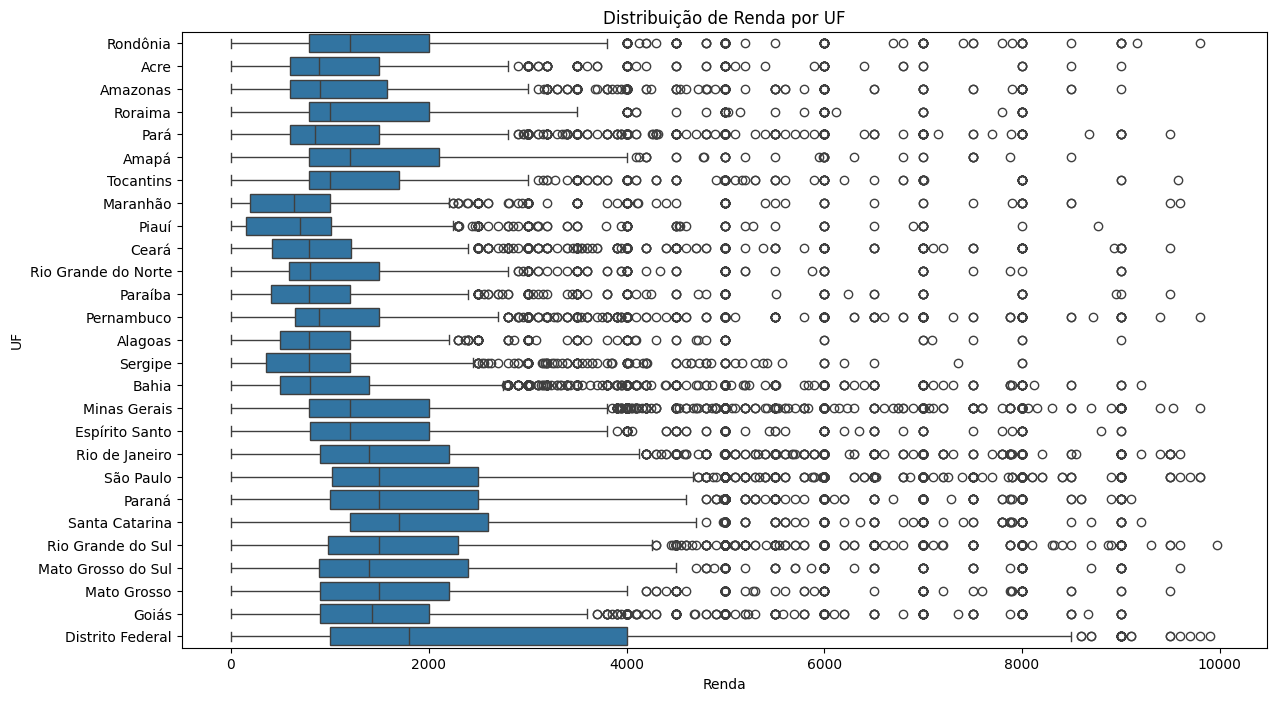

In [181]:
# Criar o boxplot da renda por UF
ax_renda_sexo= sns.boxplot(x='Renda', y='UF', orient = 'h', data=dados.query('Renda<10000'))
ax_renda_sexo.figure.set_size_inches(14,8)
# Ajustar título e rótulos
plt.title('Distribuição de Renda por UF')
plt.xlabel('Renda')
plt.ylabel('UF')

# Alterar os rótulos do eixo y usando o dicionário de Anos de Estudo
novo = [uf[label] for label in dados['UF'].unique()]
ax_renda_sexo.set_yticklabels(novo)

# Exibir o gráfico
plt.show()

> ### Conclusões

AS rendas no DF é superior aos dos outros estados. .